<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

## *Data Science Unit 4 Sprint 2 Assignment 2*

# Document Representations: Bag-Of-Words

In [17]:
import re
import string

#!pip install -U nltk

import nltk
#nltk.download('punkt')
#nltk.download('stopwords')
from nltk.tokenize import sent_tokenize # Sentence Tokenizer
from nltk.tokenize import word_tokenize # Word Tokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.probability import FreqDist

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import squarify

# 1) (optional) Scrape 100 Job Listings that contain the title "Data Scientist" from indeed.com

At a minimum your final dataframe of job listings should contain
- Job Title
- Job Description

If you choose to not to scrape the data, there is a CSV with outdated data in the directory. Remeber, if you scrape Indeed, you're helping yourself find a job. ;)

In [18]:
url = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/master/module2-vector-representations/job_listings.csv'

df = pd.read_csv(url).drop(columns=['Unnamed: 0'])
df.head()

,description,title
0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist
1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I
2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level
3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist
4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist


In [19]:
df.iloc[0].description

'b"<div><div>Job Requirements:</div><ul><li><p>\\nConceptual understanding in Machine Learning models like Nai\\xc2\\xa8ve Bayes, K-Means, SVM, Apriori, Linear/ Logistic Regression, Neural, Random Forests, Decision Trees, K-NN along with hands-on experience in at least 2 of them</p>\\n</li><li><p>Intermediate to expert level coding skills in Python/R. (Ability to write functions, clean and efficient data manipulation are mandatory for this role)</p>\\n</li><li><p>Exposure to packages like NumPy, SciPy, Pandas, Matplotlib etc in Python or GGPlot2, dplyr, tidyR in R</p>\\n</li><li><p>Ability to communicate Model findings to both Technical and Non-Technical stake holders</p>\\n</li><li><p>Hands on experience in SQL/Hive or similar programming language</p>\\n</li><li><p>Must show past work via GitHub, Kaggle or any other published article</p>\\n</li><li><p>Master\'s degree in Statistics/Mathematics/Computer Science or any other quant specific field.</p></li></ul><div><div><div><div><div><d

## 2) Use Spacy to tokenize / clean the listings 

In [20]:
import spacy
from spacy.tokenizer import Tokenizer

nlp = spacy.load("en_core_web_sm")
tokenizer = Tokenizer(nlp.vocab)
ignore_chars = ['<', '>', '=', '\\', '|', '||']
tokens = []

for doc in tokenizer.pipe(df['description'], batch_size=500):
    doc_tokens = []
    for token in doc:
        if (token.is_stop == False) and (token.is_punct == False):
            word = True
            for char in ignore_chars:
                if char in token.text:
                    word = False
                    break
            if word:
                doc_tokens.append(token.text.lower())        
    tokens.append(doc_tokens)
            
df['tokens'] = tokens

df.head()

,description,title,tokens
0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist,"[understanding, machine, learning, models, lik..."
1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I,"[data, scientist, 1,, help, build, machine, le..."
2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level,"[data, scientist, working, consulting, busines..."
3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist,"[$6,756, general, supervision, professors, dan..."
4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist,"[usa, multiple, years, analytics, business, re..."


In [21]:
df.shape

(426, 3)

# 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english', lowercase=False, tokenizer=lambda x:x)
data = df.tokens
dtm = vectorizer.fit_transform(data)
dtm_dense = dtm.todense()
features = vectorizer.get_feature_names()
dtm_df = pd.DataFrame(dtm_dense, columns=features)

/home/jm/anaconda3/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['b', 'c', 'd', 'e', 'f', 'g', 'h', 'k', 'l', 'm', 'n', 'o', 'p', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [23]:
dtm_df.shape

(426, 12856)

In [33]:
dtm_df.head()

,"""ability","""apply""","""best","""big","""can","""can-do""","""completeness","""customer","""engineering","""fintech""",...,zero.,zeus,zf,"zheng,",zillow,zoom,zuckerberg,zurich,~$70,~4
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 4) Visualize the most common word counts

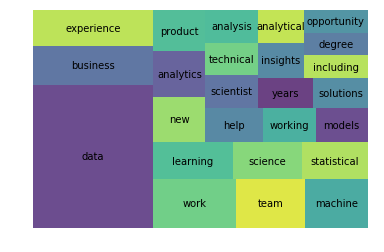

In [30]:
top_25 = dtm_df.sum().sort_values(ascending=False)[:25]
squarify.plot(sizes=top_25.values, label=top_25.index, alpha=.8 )
plt.axis('off')
plt.show()

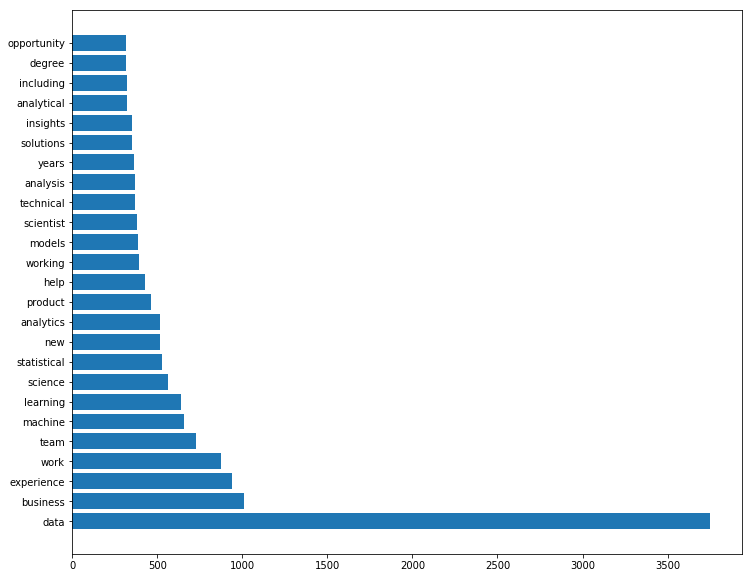

In [32]:
fig,ax = plt.subplots(figsize=(12,10))
plt.barh(top_25.index, top_25.values)
plt.show()

 # 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

data = []
#convert each row list of tokens into strings, then append to one big list:
for token in list(df.tokens):
    data.append(' '.join(token))

tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
feat_matrix = tfidf.fit_transform(data)
dense_feat_matrix = feat_matrix.todense()
features = tfidf.get_feature_names()

# View Feature Matrix as DataFrame
tfidf_df = pd.DataFrame(dense_feat_matrix, columns=features)
tfidf_df.head(10)

,000,04,10,100,11,12,14,15,150,17,...,yes,yeti,york,young,yrs,zero,zeus,zf,zillow,zurich
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.058794,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


 # 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [10]:
# Instantiate
from sklearn.neighbors import NearestNeighbors

nn = NearestNeighbors(n_neighbors=5, algorithm='ball_tree')

# Fit on TF-IDF Vectors
nn.fit(dense_feat_matrix)

ideal_job = ['finance blockchain analytics sports']
ideal_job = tfidf.transform(ideal_job).todense()

# Query Using kneighbors:
nn.kneighbors(ideal_job)

(array([[1.29181797, 1.34825386, 1.35487175, 1.35487175, 1.35660143]]),
 array([[185, 289, 134, 355, 265]]))

In [11]:
data[185]

'senior data scientist skilled problem solver passion utilizing data drive business decisions interest driving sports industry forward. position involve working closely analytics business intelligence teams planning, execution, delivery kagr analytics data science products. products include variety predictive models, marketing analytics, forecasting, development sales business analytics, etc. additionally, senior data scientist responsible building new expertise analytics &amp; data science team training product analytics group (kagr) technology services company comprised brilliant group data science data analytics professionals game sports entertainment industry. company data-driven decision making focuses growing line. leverage proprietary technology platform power clients major u.s. sports leagues, college athletics. environment innovative, technically stimulating, fast-paced exciting. inspirational leadership ceo jessica gelman, basketball court conference room office view overlook

In [34]:
df.iloc[185].description

'b\'<div></div><div><div><div><div><div><p>Full-time Position</p>\\n<p>\\nThe Senior Data Scientist will be a skilled problem solver who has a passion for utilizing data to drive business decisions and interest in driving the sports industry forward. The position will involve working closely with the analytics and business intelligence teams for the planning, execution, and delivery of all KAGR analytics and data science products. Products may include a variety of predictive models, marketing analytics, forecasting, development of sales and business analytics, etc. Additionally, the Senior Data Scientist will be responsible for building new expertise within the Analytics &amp; Data Science team through training and product R&amp;D.</p>\\n</div></div></div></div><div><div><div><div><h4 class="jobSectionHeader"><b>The Company</b></h4>\\nKraft Analytics Group (KAGR) is technology and services company comprised of a brilliant group of data science and data analytics professionals who are a

In [12]:
data[289]

'leading software platform digital assets. offering largest production blockchain platform world, share passion code, create, ultimately build open, accessible fair financial future, piece software time. looking add data scientist analyst growth team expand tens millions users statistical techniques complex data sets understand users geographies engagement analyze, interpret trends patterns provide ongoing reports data visualisations, order recommendations wider internal stakeholders external business partners ensure accurate collection logging data needed provide insights user engagement help drive business performance marketing campaigns customer referral programs. build data pipelines import traffic data daily machine learning models email targeting, content recommendation algorithms, delivery &amp; targeting infrastructure, in-product notification experience ios, android degree mathematics, statistics, economics, cs, engineering hard years professional working experiment'

In [13]:
data[134]

'innovation center clearwater analytics solves significant problems new technology techniques. innovation center explores uses machine learning, rpa, blockchain technology creates step-change clients, markets employees. system largest technology firms, fixed income asset managers, custodian banks. firms rely ability solve difficult, seemingly impossible problems. innovation key driver looking talented individuals thrive solving problems developing new skills. offer competitive compensation package, exposure cutting-edge financial market issues &amp; information, business casual workplace, beautiful surroundings work-life solution problem way dramatic positive technical direction team persuasion, leadership, force better community interest technology domain standard enterprise, adoption significantly impact company ability decompose problems root causes follow engineered approach finding appropriate years professional working experience data science experience machine learning data anal

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.